# GoBike System Data

*By: Phuong Tran*
*06/16/2020*

## Introduction
**Investigation Overview**

> The goal of this project is to dig into the bike data to understand about different factors that is affecting bike trip durations

**Dataset Overview**

> The dataset is from Bay Wheel's trip data and it is available for public use. It contains trip informations and bikers' subscribe status. This data set is taken from Lyft's website for year of 2017

In [2]:
## Import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
## Load data set in and inspect data
df = pd.read_csv('df_final.csv')

### Duration
> This graph show the distribution of trip duration over a range of time (in seconds). Most trips' duration is around 12 to 15 minutes.

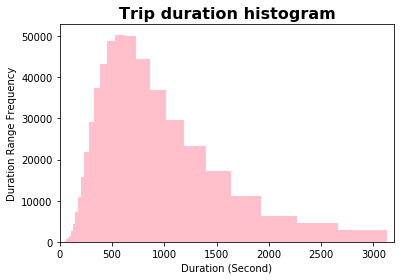

In [6]:
bins = 5 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.hist(df['duration_sec'], bins=bins, color='pink')
plt.xlim(0,3200) 
plt.xlabel('Duration (Second)')
plt.title('Trip duration histogram',  fontweight='bold', fontsize=16)
plt.ylabel('Duration Range Frequency')
plt.show();

### Number of trip throughout every month in 2017

> There are no bike trip from January to May. Most bike trips were made in October and least trip in June. As it get colder are hotter, less and less trips were made. 

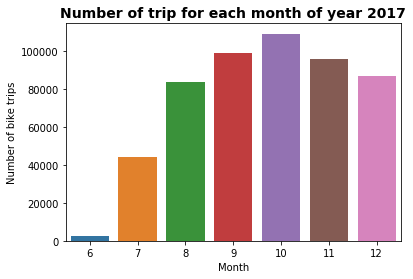

In [17]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(df['start_month'])
plt.title("Number of trip for each month of year 2017",  fontweight='bold', fontsize=14)
plt.ylabel('Number of bike trips')
plt.xlabel('Month')
plt.show()

### Trip Duration for each month of the year base on User Type

> Overally, trip duration for customers is still higher for all of the hours. Trip duration for subscriber base on month remains stable while for customers, after June, trip average duration for customer keep decreasing. 

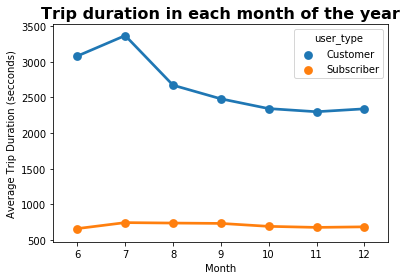

In [20]:
plt.figure(figsize = [6,4])
sns.pointplot(ci=None, x = df['start_month'], y = df['duration_sec'], hue = df['user_type'])
plt.title('Trip duration in each month of the year', fontweight='bold', fontsize=16)
plt.ylabel('Average Trip Duration (secconds)')
plt.xlabel('Month')
plt.show();

### Number of trip in 24 hours of a day

> Bike trips were made fairly same for weekday and sharply decrease in the weekend. (Weekend doesn't have as much bike trips as weekday)

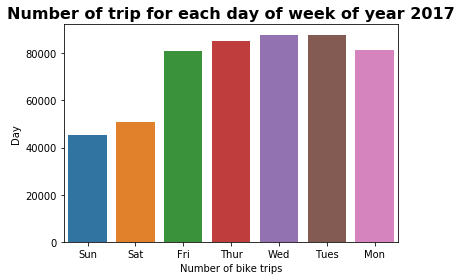

In [13]:
sns.countplot(df['start_day'])
plt.title("Number of trip for each day of week of year 2017", fontweight='bold', fontsize=16)
plt.xlabel('Number of bike trips')
plt.ylabel('Day')
plt.show()

### Hour distribution

> There is no outlier in the graph therefore nothing extreme is in the graph. Most hour is around 2 pm and who has bike trip at the midnight?

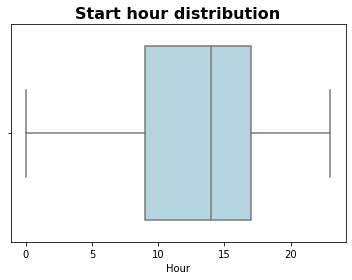

In [16]:
sns.boxplot(df['start_hour'], color='lightblue')
plt.title('Start hour distribution', fontweight='bold', fontsize=16)
plt.xlabel('Hour')
plt.show()

### Number of trip base on User Type

> Trip Duration base on different hour of the day for each user show a bimodal with merely normal distributed with peak at 8 am and 5 pm. Meanwhile, for customers, the number of trips spread out evenly for "working hours' and start to decrease when night time comes. For both of the user type, there is almost no trip for 2am to 4am. 

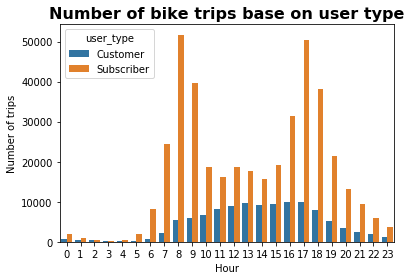

In [15]:
sns.countplot(df['start_hour'], hue=df['user_type'])
plt.title('Number of bike trips base on user type', fontweight='bold', fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.show()

### Trip Duration for each hour of the day base on User Type

> Overally, trip duration for customers is higher for all of the hours. Like months, except for 3 am,  average trip duration remain stable while customer is fluctuating.

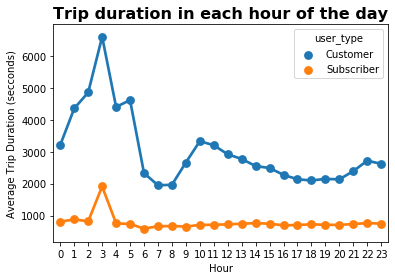

In [21]:

plt.figure(figsize = [6,4])
sns.pointplot(ci=None, x = df['start_hour'], y = df['duration_sec'], hue = df['user_type'])
plt.title('Trip duration in each hour of the day', fontweight='bold', fontsize=16)
plt.ylabel('Average Trip Duration (secconds)')
plt.xlabel('Hour')
plt.show();

### Trip duration base on user type

> User Type and Trip Duration: When comparing user type and trip duration, both of the user type has linear relationship with the trip duration as when the trip duration increase, it is getting less and less dense. However, customer tends to have their bike trip longer than subscriber as from around 20000 seconds, it starts to be less compact for subscibers whereas customer points remain densly for almost every of the trip durations. 

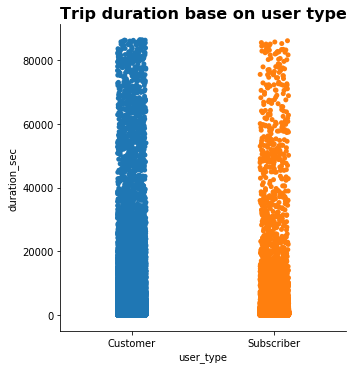

In [12]:
sns.catplot(x="user_type", y="duration_sec", data=df)
plt.title('Trip duration base on user type', fontweight='bold', fontsize=16)
plt.show()

### Top 10 most stations with bike trips and user type

> There was no actual relationship between the top 10 stations and the number of trips have taken from that station. Maybe it's famous because most of the bikers is near that stations?

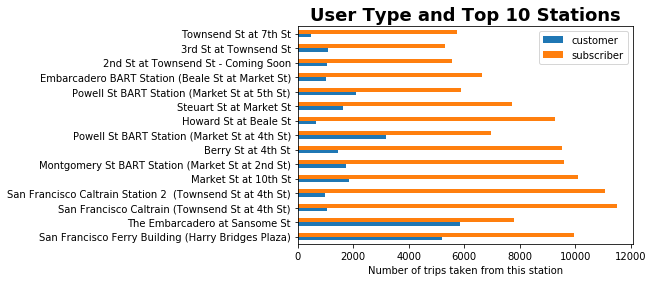

In [22]:
sub = dict(df[df['user_type']=='Subscriber']['start_station_name'].value_counts())
cus = dict(df[df['user_type']=='Customer']['start_station_name'].value_counts())

y_sub=[]
y_cus=[]

x = df['start_station_name'].value_counts().index[0:15]

for i in x:
    y_sub.append(sub[i])
    y_cus.append(cus[i])
    
dummy_df = pd.DataFrame({'customer': y_cus, 'subscriber':y_sub}, index=x)

ax = dummy_df.plot.barh()
plt.title("User Type and Top 10 Stations", fontsize=18, fontweight='bold')
plt.xlabel('Number of trips taken from this station')
plt.show()